In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("/Users/mjhans/dev/gitRepo/basic_mathmatics/linearAlgebra/chicago_crime/Chicago_Crimes_2001_to_2004.csv")


/Users/mjhans/dev/pythonVenv/python36_dev/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:

#datetime = posts['time'].apply(lambda x: datetime.strptime(x, '%I:%M:%S %p').strftime('%I:%M:%S'))
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y %I:%M:%S %p") # errors='ignore'
df["Day"] = df["Date"].dt.date
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df.sample()
# ds = "06/20/2004 11:00:00 AM"
# from datetime import datetime 
# datetime.strptime(ds, "%m/%d/%Y %H:%M:%S %p")

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Month
270179,3810503,1652028,G424675,2001-07-19 22:30:00,018XX E 71 ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,...,18,1189437.0,1.85833e+06,2001,08/17/2015 03:03:40 PM,41.7663,-87.581198,"(41.766300973, -87.581197899)",2001-07-19,7


In [4]:
newDf = df.filter(['Year', 'Month','Day','Primary Type'], axis=1)
newDf["Primary Type"].unique()

array(['THEFT', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'NARCOTICS', 'GAMBLING', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL DAMAGE', 'ASSAULT', 'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'KIDNAPPING', 'INTIMIDATION', 'RITUALISM', 'DOMESTIC VIOLENCE',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL'],
      dtype=object)

In [29]:
# calaculate histogram with THEFT, MOTOR VEHICLE THEFT, GAMBLING, ASSAULT, STALKING

theft_df = newDf[newDf["Primary Type"] == "THEFT"]

histDF = theft_df.groupby(["Year", "Day"], as_index=False).agg("count").filter(["Year", "Primary Type"])
histDF.tail()

,Year,Primary Type
1456,2004,218
1457,2004,239
1458,2004,209
1459,2004,225
1460,2004,223


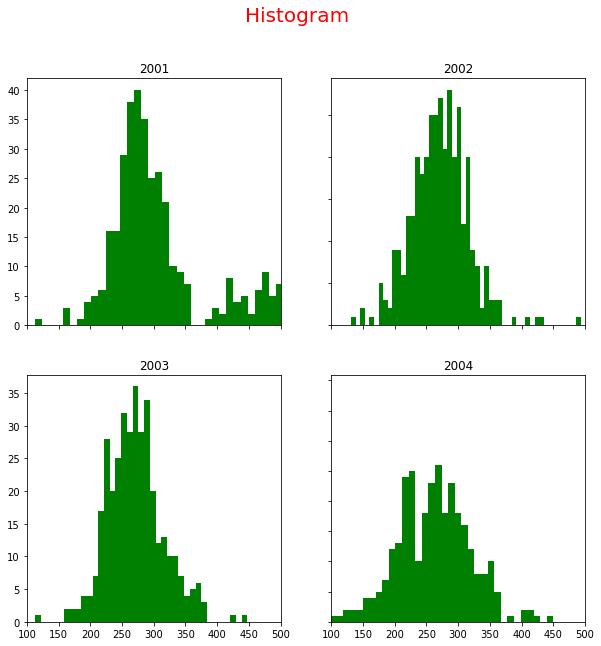

In [97]:
n_bins = 50
#fig = plt.figure()
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
#histData.hist(bins=5)


histData = histDF[histDF["Year"] == 2001].filter(["Primary Type"])
axs[0,0].hist(histData.values, bins=n_bins, color="green")
axs[0,0].set_title("2001")

histData = histDF[histDF["Year"] == 2002].filter(["Primary Type"])
axs[0,1].hist(histData.values, bins=n_bins, color="green")
axs[0,1].set_title("2002")

histData = histDF[histDF["Year"] == 2003].filter(["Primary Type"])
axs[1,0].hist(histData.values, bins=n_bins, color="green")
axs[1,0].set_title("2003")

histData = histDF[histDF["Year"] == 2004].filter(["Primary Type"])
axs[1,1].hist(histData.values, bins=n_bins, color="green")
axs[1,1].set_title("2004")


fig.suptitle('Histogram', fontsize=20, color="red")
for ax in axs.flat:
	ax.set_xlim([100, 500])
	ax.label_outer()